In [1]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('income.csv')
df.head()

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
INCOME,303.0,245.273927,48.499412,126.0,211.0,240.0,274.0,417.0
SPEND,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0


In [5]:
df.isnull().sum()

INCOME    0
SPEND     0
dtype: int64

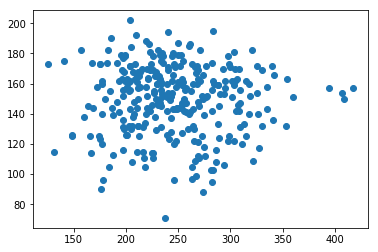

In [8]:
import matplotlib.pyplot as plt
plt.scatter(df['INCOME'],df['SPEND'])
plt.show()

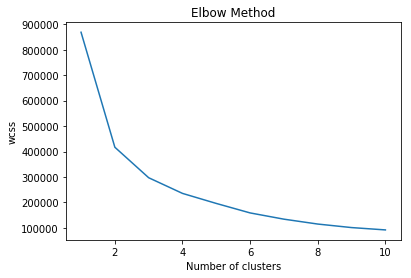

In [11]:
#Using the elbow method to find the optimum number of clusters
from sklearn.cluster import KMeans
X=df[['INCOME','SPEND']]
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()


In [48]:
from sklearn.cluster import KMeans
# create kmeans object
km = KMeans(n_clusters=4)
# fit kmeans object to data
km.fit(X)
# print location of clusters learned by kmeans object
km.labels_

array([3, 3, 0, 3, 2, 0, 2, 3, 0, 0, 3, 1, 3, 0, 3, 0, 2, 1, 3, 3, 3, 3,
       3, 3, 0, 2, 0, 0, 2, 0, 0, 0, 3, 3, 0, 0, 2, 3, 3, 2, 2, 3, 0, 3,
       2, 2, 3, 3, 0, 3, 3, 2, 3, 0, 3, 0, 3, 3, 0, 2, 1, 2, 0, 0, 0, 0,
       0, 3, 3, 0, 3, 3, 0, 3, 0, 3, 3, 3, 0, 3, 3, 2, 2, 2, 1, 3, 3, 0,
       0, 1, 3, 0, 3, 2, 0, 1, 2, 3, 2, 3, 3, 3, 0, 3, 0, 0, 3, 3, 3, 3,
       2, 0, 2, 0, 3, 0, 0, 0, 0, 3, 2, 3, 3, 3, 0, 0, 0, 3, 0, 1, 0, 3,
       2, 3, 2, 3, 0, 0, 0, 1, 2, 2, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 3, 3,
       0, 0, 3, 0, 0, 3, 3, 2, 0, 0, 0, 1, 3, 3, 3, 0, 3, 3, 3, 3, 0, 0,
       3, 2, 0, 1, 2, 1, 2, 3, 1, 2, 3, 1, 3, 0, 2, 0, 0, 1, 0, 2, 3, 3,
       1, 3, 0, 3, 1, 3, 0, 3, 3, 3, 0, 0, 3, 3, 0, 2, 3, 2, 1, 2, 1, 3,
       2, 0, 3, 1, 1, 0, 1, 0, 2, 2, 3, 1, 2, 1, 2, 2, 2, 2, 2, 3, 1, 3,
       0, 1, 0, 3, 2, 1, 3, 3, 1, 3, 1, 2, 1, 2, 1, 0, 3, 3, 3, 3, 1, 3,
       0, 0, 2, 0, 1, 1, 3, 3, 1, 3, 1, 0, 1, 3, 2, 0, 2, 0, 0, 3, 0, 2,
       0, 3, 2, 0, 0, 2, 3, 0, 0, 0, 0, 0, 1, 1, 0,

In [15]:
#adding the cluster labels into the dataframe
df['labels']=km.labels_

In [16]:
df.head()

,INCOME,SPEND,labels
0,233,150,2
1,250,187,2
2,204,172,1
3,236,178,2
4,354,163,0


In [30]:
df['labels'].value_counts()

2    111
1     97
0     55
3     40
Name: labels, dtype: int64

In [24]:
df.index[df['labels']==1].tolist()

[2,
 5,
 8,
 9,
 13,
 15,
 24,
 26,
 27,
 29,
 30,
 31,
 34,
 35,
 42,
 48,
 53,
 55,
 58,
 62,
 63,
 64,
 65,
 66,
 69,
 72,
 74,
 78,
 87,
 88,
 91,
 94,
 102,
 104,
 105,
 111,
 113,
 115,
 116,
 117,
 118,
 124,
 125,
 126,
 128,
 130,
 136,
 137,
 138,
 142,
 143,
 144,
 149,
 151,
 154,
 155,
 157,
 158,
 162,
 163,
 164,
 169,
 174,
 175,
 178,
 189,
 191,
 192,
 194,
 200,
 204,
 208,
 209,
 212,
 225,
 227,
 242,
 244,
 257,
 264,
 265,
 267,
 275,
 279,
 281,
 282,
 284,
 286,
 289,
 290,
 293,
 294,
 295,
 296,
 297,
 300,
 301]

In [50]:
#creating a dataframe for testing the model
data = [[120,30], [300, 100], [160, 14]] 
  
# Create the pandas DataFrame 
x_test = pd.DataFrame(data, columns=['Income','Spend']) 
  
# print dataframe. 
print(x_test)


   Income  Spend
0     120     30
1     300    100
2     160     14


In [53]:
km.predict(x_test)

array([0, 1, 0])

In [55]:
y_pred=km.predict(X)

In [58]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(df['labels'],y_pred)
print (cm)
s=accuracy_score(df['labels'],y_pred)
print(s*100)

[[  0   1  54   0]
 [ 97   0   0   0]
 [  0   0   0 111]
 [  1  37   0   2]]
0.6600660066006601


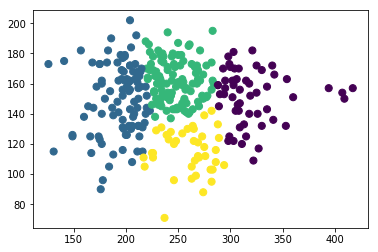

In [60]:
plt.scatter(df['INCOME'],df['SPEND'],c=df['labels'],s=50)

# Agglomerative Clustering

In [1]:
import pandas as pd
import numpy as np
df1=pd.read_csv('income.csv')
x=df1[['INCOME','SPEND']]
from sklearn.cluster import AgglomerativeClustering
ag_cl = AgglomerativeClustering(n_clusters=2)
ag_cl.fit(x)
ag_cl
ag_cl.labels_
df1['labels']=ag_cl.labels_
df1['labels'].head()

0    0
1    0
2    1
3    0
4    0
Name: labels, dtype: int64

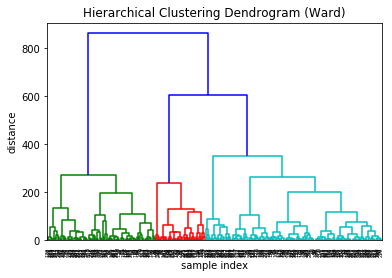

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
linkage_matrix = linkage(x, 'ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.show()

In [22]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(df1, metric='euclidean')
D

array([[  0.        ,  40.71854614,  36.41428291, ...,  41.01219331,
        107.84247772,  24.18677324],
       [ 40.71854614,   0.        ,  48.39421453, ...,  73.25298629,
        139.08989899,  19.10497317],
       [ 36.41428291,  48.39421453,   0.        , ...,  32.89376841,
         92.61749295,  32.07802986],
       ...,
       [ 41.01219331,  73.25298629,  32.89376841, ...,   0.        ,
         67.23094526,  54.21254467],
       [107.84247772, 139.08989899,  92.61749295, ...,  67.23094526,
          0.        , 120.4450082 ],
       [ 24.18677324,  19.10497317,  32.07802986, ...,  54.21254467,
        120.4450082 ,   0.        ]])